In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

PRE_TRAIN_DATA_PATH = os.getenv("PRE_TRAIN_DATA_PATH")
PRE_TEST_DATA_PATH = os.getenv("PRE_TEST_DATA_PATH")

In [2]:
import pandas as pd

train_df = pd.read_csv(str(PRE_TRAIN_DATA_PATH))
test_df = pd.read_csv(str(PRE_TEST_DATA_PATH))

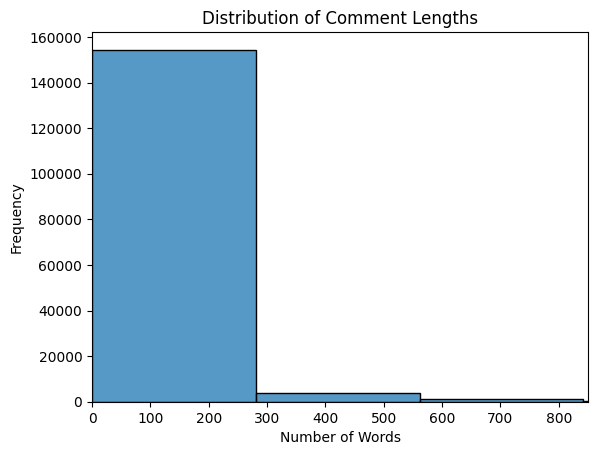

In [6]:
# calculate text length
train_df['text_length'] = train_df['clean_text'].fillna("").astype(str).apply(lambda x: len(x.split()))

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df['text_length'], bins=5)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.xlim(0,850)
plt.show()

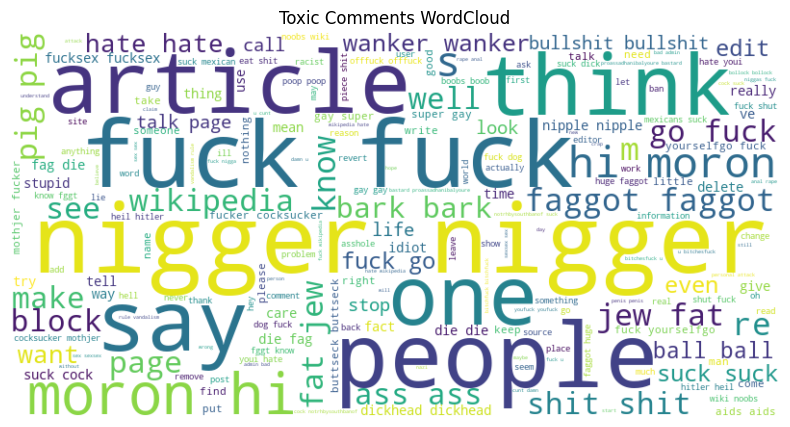

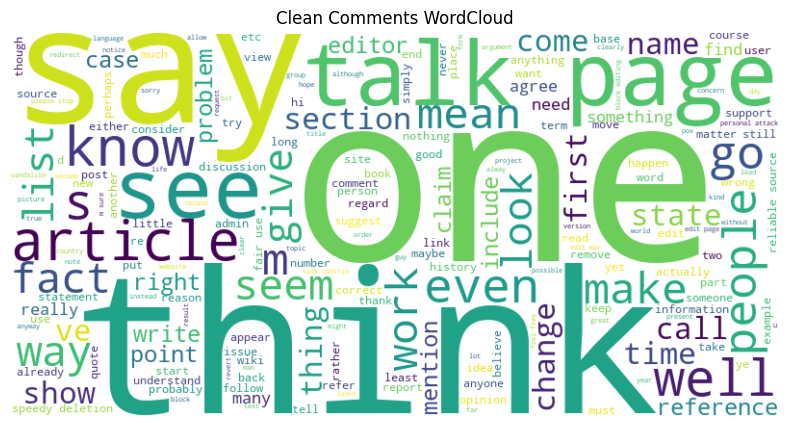

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

train_df['lemmatized'] = train_df['lemmatized'].fillna("").astype(str)
test_df['lemmatized'] = test_df['lemmatized'].fillna("").astype(str)

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Separate toxic and clean text
any_toxic_text = ' '.join(
    train_df[train_df[labels].any(axis=1)]['lemmatized'].astype(str)
)
clean_text = ' '.join(
    train_df[~train_df[labels].any(axis=1)]['lemmatized'].astype(str)
)

# Generate WordCloud for toxic comments
toxic_wc = WordCloud(width=800, height=400, background_color='white').generate(any_toxic_text)
plt.figure(figsize=(10, 5))
plt.imshow(toxic_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Toxic Comments WordCloud")
plt.show()

# Generate WordCloud for clean comments
clean_wc = WordCloud(width=800, height=400, background_color='white').generate(clean_text)
plt.figure(figsize=(10, 5))
plt.imshow(clean_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Clean Comments WordCloud")
plt.show()